 Stufe1:
 1)
 Lies noch einmal das Prinzip nach , wie man grundsätzlich einen Entscheidungsbaum erstellt,
 zB Code und Formeln können ignoriert werden.
 2)
 Mache dir klar, dass es verschiedene Methoden gibt, um an aussagekräftige Unterteilungen zu gelangen,
 in denen die entstehenden Untergruppen möglichst homogen sind.
 Lies dazu etwas über Entropie und Gini Impurity,
 z.B. in https://data-science-blog.com/blog/2017/05/02/entropie-und-andere-mase-fur-unreinheit-in-daten/
 oder Wikipedia
 3)
 Versuche den unten stehenden Code zu verstehen.
 wichtig sind die Import-Zeilen und der Einsatz des Classifiers
 Gehe über die Details zum Plotten und Meshgrid am besten hinweg.(Nicht festbeißen!!)

 Stufe 2:
 4) Wende den Classifier auf einen anderen Datensatz deiner Wahl an,
 unterteile vorher in Test und Trainingsmenge und ermittel die Anzahl der Abweichungen
 5) Das gleiche , aber verwende auch Parameter der Klasse aus der Doku
 Stufe 3:
 Benutze den DecisionTreeRegressor mit einem Beispiel Deiner wahl

 # Imports:

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython import get_ipython
if type(get_ipython()).__name__ == 'ZMQInteractiveShell':  # IPython Notebook!
    get_ipython().run_line_magic('matplotlib', 'inline')  # '%matplotlib inline'
    get_ipython().run_line_magic('load_ext', 'autoreload')  # '%load_ext autoreload'
    get_ipython().run_line_magic('autoreload', '2')  # '%autoreload 2' (reloads everything)
# Change working directory to file location:
os.chdir(R'C:\Users\Jan\Projects\mlalfa\scripts')
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)



 # Load data and set parameters:
 train_test_split ist in diesem Beispiel nicht nötig,
 weil es nur auf die Darstellung ankommt.
 Um es einfach zu halten, werden die gesamten Iris-Daten zur Konstruktion des Baumes benutzt.
 Für die Voraussage werden dann die restlichen Punkte des gesamten Koordinatensystems benutzt.

In [2]:
# Load data
iris = load_iris()
n_classes = 3
plot_step = 0.02
plot_colors = "ryb"


 Hier werde Paare aus Spalten ausgewählt, die nacheinander vom Classifier verarbeitet werden sollen.
 Dabei entstehen so viele Plots , wie es Spaltenpaare gibt
 Beispiel: Spalte 0 steht für Sepal_length
 Die for-Schleife baut für jede Spaltenkombination eine eigene Instanz des Classifiers auf und plottet das Ergebnis

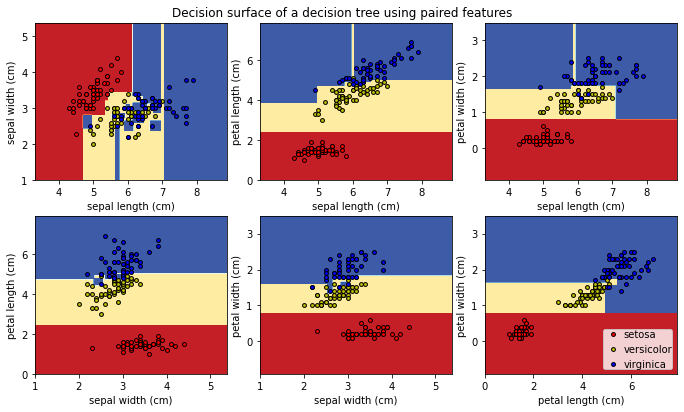

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for pair_idx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    # Pair bezeichnet die Indizes der Spalten, die aus der gesamten Irismenge verwendet werden
    X = iris.data[:, pair]
    y = iris.target
    # Train
    # Das wichtigste Ergebnis von dem fit ist , dass der Baum jetzt aufgebaut ist.
    # Er wird unter dem Attribut clf.tree_ abgespeichert und hinterher für Voraussagen benutzt
    clf = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    # insgesamt 6 Spaltenkombinationen führen zu 6 Grafiken,
    # die in 2 Zeilen a 3 Grafiken dargestellt werden.
    plt.subplot(2, 3, pair_idx + 1)
    # Für die Zeichnumg sind wir etwas großzügiger mit den Grenzen
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid wird eingerichtet, weil man nicht nur die Originaldatenpunkte mit ihren Voraussagen plotten will,
    # sondern auch jeden weitern Punkt einer Klasse zuordnen will
    # das Meshgrid ist aber diskret, für die Zwischenräume müssen noch Lösungen gefunden werden
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    # Für jeden Punkt(xx, yy), der im Meshgrid definiert ist, werden Features und Daten
    # hintereinandergeschrieben und vorausgesagt: Schleife in der for-Schleife
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # np.c_[...]: column stack!
    # xx, yy sind hier KOORDINATEN, nicht features / label!!
    # Die Klassenvoraussage wird 2-dimensional, ordnet sich gemäß x und y an
    Z = Z.reshape(xx.shape)
    # Färbe nicht nur die meshgrid-Punkte, sondern fülle auch die Zwischenräume
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    # Add labels:
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # Plot the training points
    # Füge nachträglich die Punkte der Ausgangsdaten hinzu.
    # Für jede Klasse wird eine andere Farbe gewählt.
    for i, color in zip(range(n_classes), plot_colors):
        # i ist eine Klasse, color eine Farbe aus plot_colors,
        # beide werden im Reißverschlussverfahren in einem Tupel zusammengeführt.
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

# Some plot decorations:
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()


 # Ab hier kommt eine neue Grafik, nämlich der komplette Baum für ALLE features gefittet!

<Figure size 432x288 with 0 Axes>

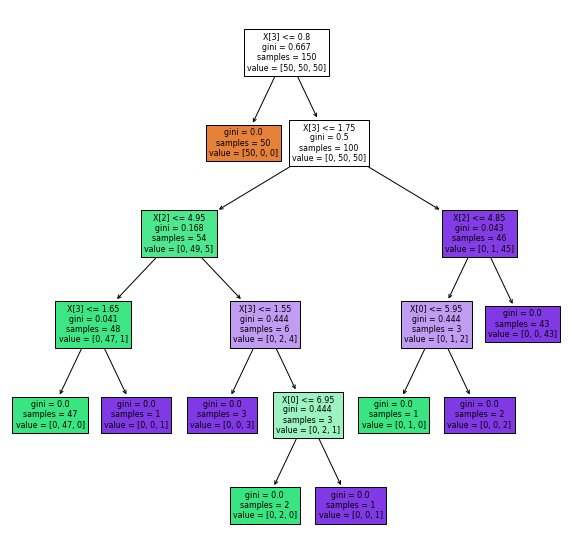

In [4]:
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True)
plt.show()
# plot_tree wurde importiert, wie gut, dass wir den nicht selbst schreiben müssen
